In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pmdarima import auto_arima

In [90]:
country = "Maldives"

In [91]:
df_confirmed = pd.read_csv("death_cases.csv")
df_confirmed_country= df_confirmed[df_confirmed["Country/Region"] == country]
df_confirmed_country= pd.DataFrame(df_confirmed_country[df_confirmed_country.columns[1:]].sum(), columns=["confirmed"])
df_confirmed_country.index = pd.to_datetime(df_confirmed_country.index,format='%m/%d/%y')

In [92]:
df_confirmed_country


,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-12-01,47
2020-12-02,47
2020-12-03,47
2020-12-04,47


In [93]:
df_confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-11-26', '2020-11-27', '2020-11-28', '2020-11-29',
               '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05'],
              dtype='datetime64[ns]', length=319, freq=None)

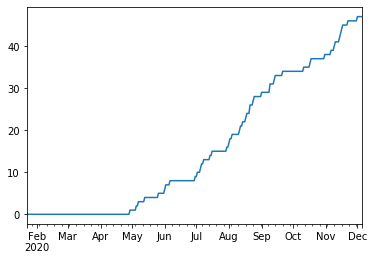

In [94]:
df_confirmed_country['confirmed'].plot()

In [95]:
from statsmodels.tsa.stattools import adfuller

In [96]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [97]:
ad_test(df_confirmed_country)

1. ADF :  3.265049850521116
2. P-Value :  1.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 318
5. Critical Values :
	 1% :  -3.451082300831733
	 5% :  -2.87067210822307
	 10% :  -2.5716355136268345


In [98]:
stepwise_fit = auto_arima(df_confirmed_country, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=272.315, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=457.112, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=383.413, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=267.447, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=268.828, Time=0.20 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=268.784, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=270.433, Time=0.34 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=268.434, Time=0.28 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.548 seconds


In [99]:
from statsmodels.tsa.arima_model import ARIMA

In [100]:
print(df_confirmed_country.shape)
train = df_confirmed_country.iloc[:-14]
test = df_confirmed_country.iloc[-14:]
print(train.shape, test.shape)

(319, 1)
(305, 1) (14, 1)


In [101]:
model=ARIMA(train,order=(0,2,2))
model=model.fit()
model.summary()

/home/manil/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/manil/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.confirmed   No. Observations:                  303
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -124.327
Method:                       css-mle   S.D. of innovations              0.361
Date:                Mon, 18 Jan 2021   AIC                            256.653
Time:                        17:12:08   BIC                            271.508
Sample:                    01-24-2020   HQIC                           262.596
                         - 11-21-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0010      0.000      4.134      0.000       0.001       0.002
ma.L1.D2.confirmed    -0.9262      0.061    -15.189      0.000      -1.046      -0.807
ma.L2.D2.confirmed    -0.0738      0.058     -1.263      0.207      -0.188       0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2          -13.5522           +0.0000j           13.5522            0.5000
-----------------------------------------------------------------------------
"""

2020-11-22    45.287687
2020-11-23    45.597570
2020-11-24    45.908501
2020-11-25    46.220480
2020-11-26    46.533506
2020-11-27    46.847581
2020-11-28    47.162703
2020-11-29    47.478873
2020-11-30    47.796091
2020-12-01    48.114357
2020-12-02    48.433671
2020-12-03    48.754033
2020-12-04    49.075442
2020-12-05    49.397899
Freq: D, Name: ARIMA Predictions, dtype: float64


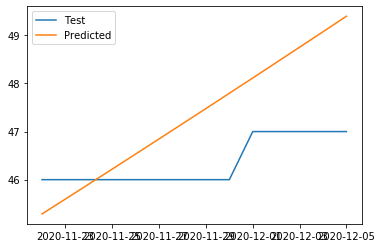

In [102]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
plt.plot(test)
plt.plot(pred)
plt.legend(["Test","Predicted"])
plt.show()
actual =pred

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
y=test.mean()

In [104]:

mse=mean_squared_error(pred,test)
print(mse)

1.7803892910991317


In [105]:
r2_score(pred, test)

-0.09598477823992879

In [106]:
model2=ARIMA(df_confirmed_country,order=(0,2,2))
model2=model2.fit()

/home/manil/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/manil/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [107]:
index_future_dates=pd.date_range(start='2020-12-05',end='2020-12-12')
#print(index_future_dates)
pred=model2.predict(start=len(df_confirmed_country),end=len(df_confirmed_country)+7,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.append(train)
pred.index=index_future_dates
print(pred)

2020-12-05    47.274296
2020-12-06    47.569061
2020-12-07    47.864735
2020-12-08    48.161320
2020-12-09    48.458814
2020-12-10    48.757218
2020-12-11    49.056532
2020-12-12    49.356756
Freq: D, Name: ARIMA Predictions, dtype: float64


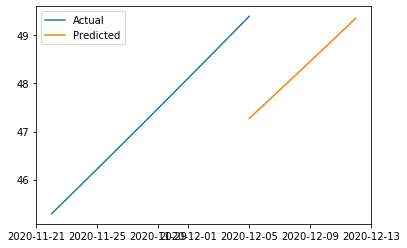

<Figure size 3600x864 with 0 Axes>

In [108]:

plt.plot(actual,label = actual)
plt.plot(pred,label = pred)
plt.legend(["Actual","Predicted"])
plt.figure(figsize=(50, 12))
plt.show()

In [109]:
print(actual)

2020-11-22    45.287687
2020-11-23    45.597570
2020-11-24    45.908501
2020-11-25    46.220480
2020-11-26    46.533506
2020-11-27    46.847581
2020-11-28    47.162703
2020-11-29    47.478873
2020-11-30    47.796091
2020-12-01    48.114357
2020-12-02    48.433671
2020-12-03    48.754033
2020-12-04    49.075442
2020-12-05    49.397899
Freq: D, Name: ARIMA Predictions, dtype: float64


In [110]:
print(pred)

2020-12-05    47.274296
2020-12-06    47.569061
2020-12-07    47.864735
2020-12-08    48.161320
2020-12-09    48.458814
2020-12-10    48.757218
2020-12-11    49.056532
2020-12-12    49.356756
Freq: D, Name: ARIMA Predictions, dtype: float64
